In [0]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
import os
import string
import matplotlib.pyplot as plt

In [0]:
# 改 keras官方
class captcha(tf.keras.utils.Sequence):
    """Helper to iterate over the data (as Numpy arrays)."""

    def __init__(self, batch_size, img_size, input_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        # self.target_img_paths = target_img_paths

    def __len__(self):
        return len(self.input_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        # batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")
        for j, path in enumerate(batch_input_img_paths):
            img = load_img(path, target_size=self.img_size)
            x[j] = img
        # y = np.zeros((batch_size,) + self.img_size + (1,), dtype="uint8")
        # for j, path in enumerate(batch_target_img_paths):
        #     img = load_img(path, target_size=self.img_size, color_mode="grayscale")
        #     y[j] = np.expand_dims(img, 2)
        y = np.zeros((self.batch_size, 4, 62), dtype='uint8')
        for j, path in enumerate(batch_input_img_paths):
          label = path.split('/')[-1][:-4]
          for ax, char in enumerate(label):
            chars = string.digits + string.ascii_letters
            index = chars.find(char)
            y[j, ax, index] = 1

        return x, y

In [0]:
x = []
for img in os.listdir('/content/drive/My Drive/ImageCaptcha/captcha/train'):
  if len(img) == len('sMei.jpg'):
    x.append(os.path.join('/content/drive/My Drive/ImageCaptcha/captcha/train', img))

In [0]:
gen = captcha(32, (60, 160), x)

In [0]:
img, label = gen[0]

In [6]:
img[0].shape

(60, 160, 3)

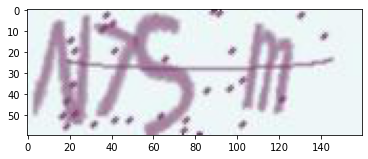

In [7]:
plt.imshow(np.array(img[0], dtype='uint8'))

In [8]:
label[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [9]:
label[0][1]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)